<a href="https://colab.research.google.com/github/AxelPribadi/LLMProject/blob/main/LLMModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets

In [2]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.9 MB/s eta 0:00:00


In [ ]:
# !pip install torch torch-xla

# LLM Project Model

## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import torch
import transformers

from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset
import evaluate # load_metric replaced with evaluate.load()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Data PreProcessing

In [7]:
# import data
# df = pd.read_csv('gdrive/MyDrive/DS Projects/AI_Human.csv')
df = pd.read_csv('sampled.csv')

print(df.shape)
df.head()

(3000, 2)


,text,generated
0,Technology has become an integral Part of our...,1.0
1,"Single plastic product, Such AG Straw, being, ...",1.0
2,The Opportunity to Graduate from Early: Benef...,1.0
3,Title: The Benefits and Drawbacks of Pairing Y...,1.0
4,"""It fink that animals should not be used in sc...",1.0


In [8]:
# convert "generated" data type float -> int
df["generated"] = df["generated"].astype(int)

# rename "generated" to "labels"
df = df.rename(columns={"generated": "labels"})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3000 non-null   object
 1   labels  3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [12]:
print(df.labels.value_counts())
df.labels.value_counts(normalize=True) * 100

labels
1    1500
0    1500
Name: count, dtype: int64


,proportion
labels,
1,50.0
0,50.0


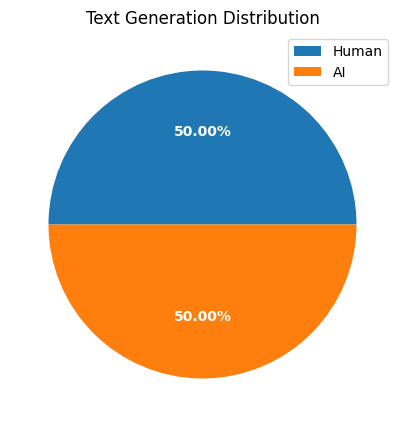

In [13]:
# plot a pie chart for data distribution
plt.figure(figsize=(5,5))

plt.pie([df["labels"].value_counts()[0], df["labels"].value_counts()[1]],
        autopct="%.2f%%",
        textprops={"color": "white", "fontweight":"bold"})

plt.legend(["Human", "AI"], loc="upper right")
plt.title("Text Generation Distribution")
plt.show()

In [14]:
df.iloc[0,0]

' Technology has become an integral Part of our daily lives, with almost everyone using it in some way. While it has brought many benefits, it has also had a significant impact on our social interactions and daily activities. In this essay, I will argue that technology has both Positive and negative effects on our lives.\n\nOn the Positive side, technology has made it easier for Google to stay connected with their loved ones, regardless of distance. Social media Platforms and messaging ages have made it Possible for Google to communicate with friends and family from all over the world. Additionally, technology has made it easier for Google to access information and knowledge, allowing them to learn and grow in new ways.\n\nHowever, there are also negative effects of technology that cannot be ignored. One of the most significant impacts is the way it has changed our social interactions. People now send more time on their devices than socializing with others, which can lead to feelings o

## Modelling

### Data Preparation

In [15]:
# convert dataset type
dataset = Dataset.from_pandas(df)
dataset

Dataset({
    features: ['text', 'labels'],
    num_rows: 3000
})

In [16]:
dataset[0]

{'text': ' Technology has become an integral Part of our daily lives, with almost everyone using it in some way. While it has brought many benefits, it has also had a significant impact on our social interactions and daily activities. In this essay, I will argue that technology has both Positive and negative effects on our lives.\n\nOn the Positive side, technology has made it easier for Google to stay connected with their loved ones, regardless of distance. Social media Platforms and messaging ages have made it Possible for Google to communicate with friends and family from all over the world. Additionally, technology has made it easier for Google to access information and knowledge, allowing them to learn and grow in new ways.\n\nHowever, there are also negative effects of technology that cannot be ignored. One of the most significant impacts is the way it has changed our social interactions. People now send more time on their devices than socializing with others, which can lead to f

In [17]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:
# tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

In [19]:
tokenized_datasets

Dataset({
    features: ['text', 'labels', 'input_ids', 'attention_mask'],
    num_rows: 3000
})

In [ ]:
# # Save the dataset for quick access later

# # using pickle
# import pickle
# from google.colab import files

# with open("/content/gdrive/MyDrive/DS Projects/tokenized_datasets.pkl", 'wb') as f:
#     pickle.dump(tokenized_datasets, f)

# print('Object saved.')

# with open('/content/gdrive/MyDrive/DS Projects/tokenized_datasets.pkl', 'rb') as f:
#     tokenized_df = pickle.load(f)



# # using the datasets library
# tokenized_datasets.save_to_disk('/content/gdrive/MyDrive/DS Projects/tokenized_datasets')


Object saved.


In [21]:
# train test split
df_train_test_split = tokenized_datasets.train_test_split(test_size=0.4, seed=111)

df_train = df_train_test_split["train"]
df_test_val = df_train_test_split["test"]

df_test_val_split = df_test_val.train_test_split(test_size=0.5, seed=111)

df_test = df_test_val_split["test"]
df_val = df_test_val_split["train"]



In [24]:
df_train, df_test, df_val

(Dataset({
     features: ['text', 'labels', 'input_ids', 'attention_mask'],
     num_rows: 1800
 }),
 Dataset({
     features: ['text', 'labels', 'input_ids', 'attention_mask'],
     num_rows: 600
 }),
 Dataset({
     features: ['text', 'labels', 'input_ids', 'attention_mask'],
     num_rows: 600
 }))

In [25]:
print(df_train.column_names)
print(df_test.column_names)
print(df_val.column_names)

['text', 'labels', 'input_ids', 'attention_mask']
['text', 'labels', 'input_ids', 'attention_mask']
['text', 'labels', 'input_ids', 'attention_mask']


### Hyperparameter Tuning

In [26]:
# set model metrics
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)
  accuracy = metric.compute(predictions=predictions, references=labels)
  return {"eval_accuracy": accuracy["accuracy"]}


In [30]:
# set model parameters
training_args = TrainingArguments(output_dir="test_trainer",
                                  num_train_epochs=3,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=16,
                                  warmup_steps=100,
                                  weight_decay=0.01,
                                  learning_rate=2e-5,
                                  logging_dir='./logs',
                                  logging_steps=50,
                                  eval_strategy="epoch",
                                  save_strategy="epoch",
                                  save_total_limit=1,
                                  load_best_model_at_end=True,
                                  metric_for_best_model='eval_accuracy',
                                  greater_is_better=True
                                  )

# set up model
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=df_train,
                  eval_dataset=df_val,
                  compute_metrics=compute_metrics
)

### Model Training and Evaluation

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss


In [29]:
eval_results = trainer.evaluate()
print(f"Evaluation Results: {eval_results}")

Evaluation Results: {'eval_accuracy': 0.99, 'eval_loss': 0.04407352954149246, 'eval_runtime': 9.6513, 'eval_samples_per_second': 62.168, 'eval_steps_per_second': 3.937, 'epoch': 3.0}


In [30]:
trainer.state.log_history

[{'loss': 0.1482,
  'grad_norm': 27.455503463745117,
  'learning_rate': 5e-05,
  'epoch': 0.6666666666666666,
  'step': 100},
 {'eval_accuracy': 0.8633333333333333,
  'eval_loss': 0.382276713848114,
  'eval_runtime': 10.0253,
  'eval_samples_per_second': 59.849,
  'eval_steps_per_second': 3.79,
  'epoch': 1.0,
  'step': 150},
 {'loss': 0.1332,
  'grad_norm': 19.205759048461914,
  'learning_rate': 3.571428571428572e-05,
  'epoch': 1.3333333333333333,
  'step': 200},
 {'loss': 0.0457,
  'grad_norm': 0.028404338285326958,
  'learning_rate': 2.1428571428571428e-05,
  'epoch': 2.0,
  'step': 300},
 {'eval_accuracy': 0.9833333333333333,
  'eval_loss': 0.08318636566400528,
  'eval_runtime': 10.1525,
  'eval_samples_per_second': 59.099,
  'eval_steps_per_second': 3.743,
  'epoch': 2.0,
  'step': 300},
 {'loss': 0.0169,
  'grad_norm': 25.818574905395508,
  'learning_rate': 7.142857142857143e-06,
  'epoch': 2.6666666666666665,
  'step': 400},
 {'eval_accuracy': 0.99,
  'eval_loss': 0.04407352954